In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

# Set board size for nxn Queeen problem.
board_size = 4
board = np.full((board_size,board_size), False)

In [2]:
def can_attack(board, row, col):
    # Check existing on the same row
    if any(board[row]):
        return True

    # Check diagonal
    offset = col - row
    if any(np.diagonal(board, offset)):
        return True
    # Check opposite diagonal
    offset = (len(board) - 1 - col) - row
    if any(np.diagonal(np.fliplr(board), offset)):
        return True

    return False

In [3]:
def draw_chessboard(ax, board, index):
    n = len(board)
    # Convert 2D board to 1D marker list
    markers = [
        x.tolist().index(True) if True in x.tolist() else None
        for x in np.transpose(board)
    ]
    res = np.add.outer(range(n), range(n)) % 2
    ax.imshow(res, cmap="binary_r")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Step {index}", fontsize=14)
    ax.plot(markers, marker="*", linestyle="None", markersize=50, color="y")


# Plot list of states
def visualize(states):
    fig, axs = plt.subplots(math.ceil(len(states) / 3), 3, figsize=(20, 20))
    for i in range(math.ceil(len(states) / 3) * 3):
        if i < len(states):
            draw_chessboard(axs[i // 3][i % 3], states[i], i + 1)
        else:
            fig.delaxes(axs[i // 3][i % 3])
    plt.show()

In [4]:
# Handle the first col as trivial
board[0][0] = True
col = 1
states = [deepcopy(board)]
while col < board_size:
    # Try to place the piece somewhere in this column
    row = 0
    while row < board_size:
    # Can place somewhere in col
        if not can_attack(board, row, col):
            board[row][col] = True
            col += 1
            states.append(deepcopy(board))
            break
        row += 1
    # Unable to place anywhere in the col
    if row == board_size:
        # Delete the first column
        board = np.delete(board, 0, 1)
        # Add a new column to the end
        new_col = [[False]] * board_size
        board = np.append(board, new_col, 1)
        states.append(deepcopy(board))
        col -= 1
        continue

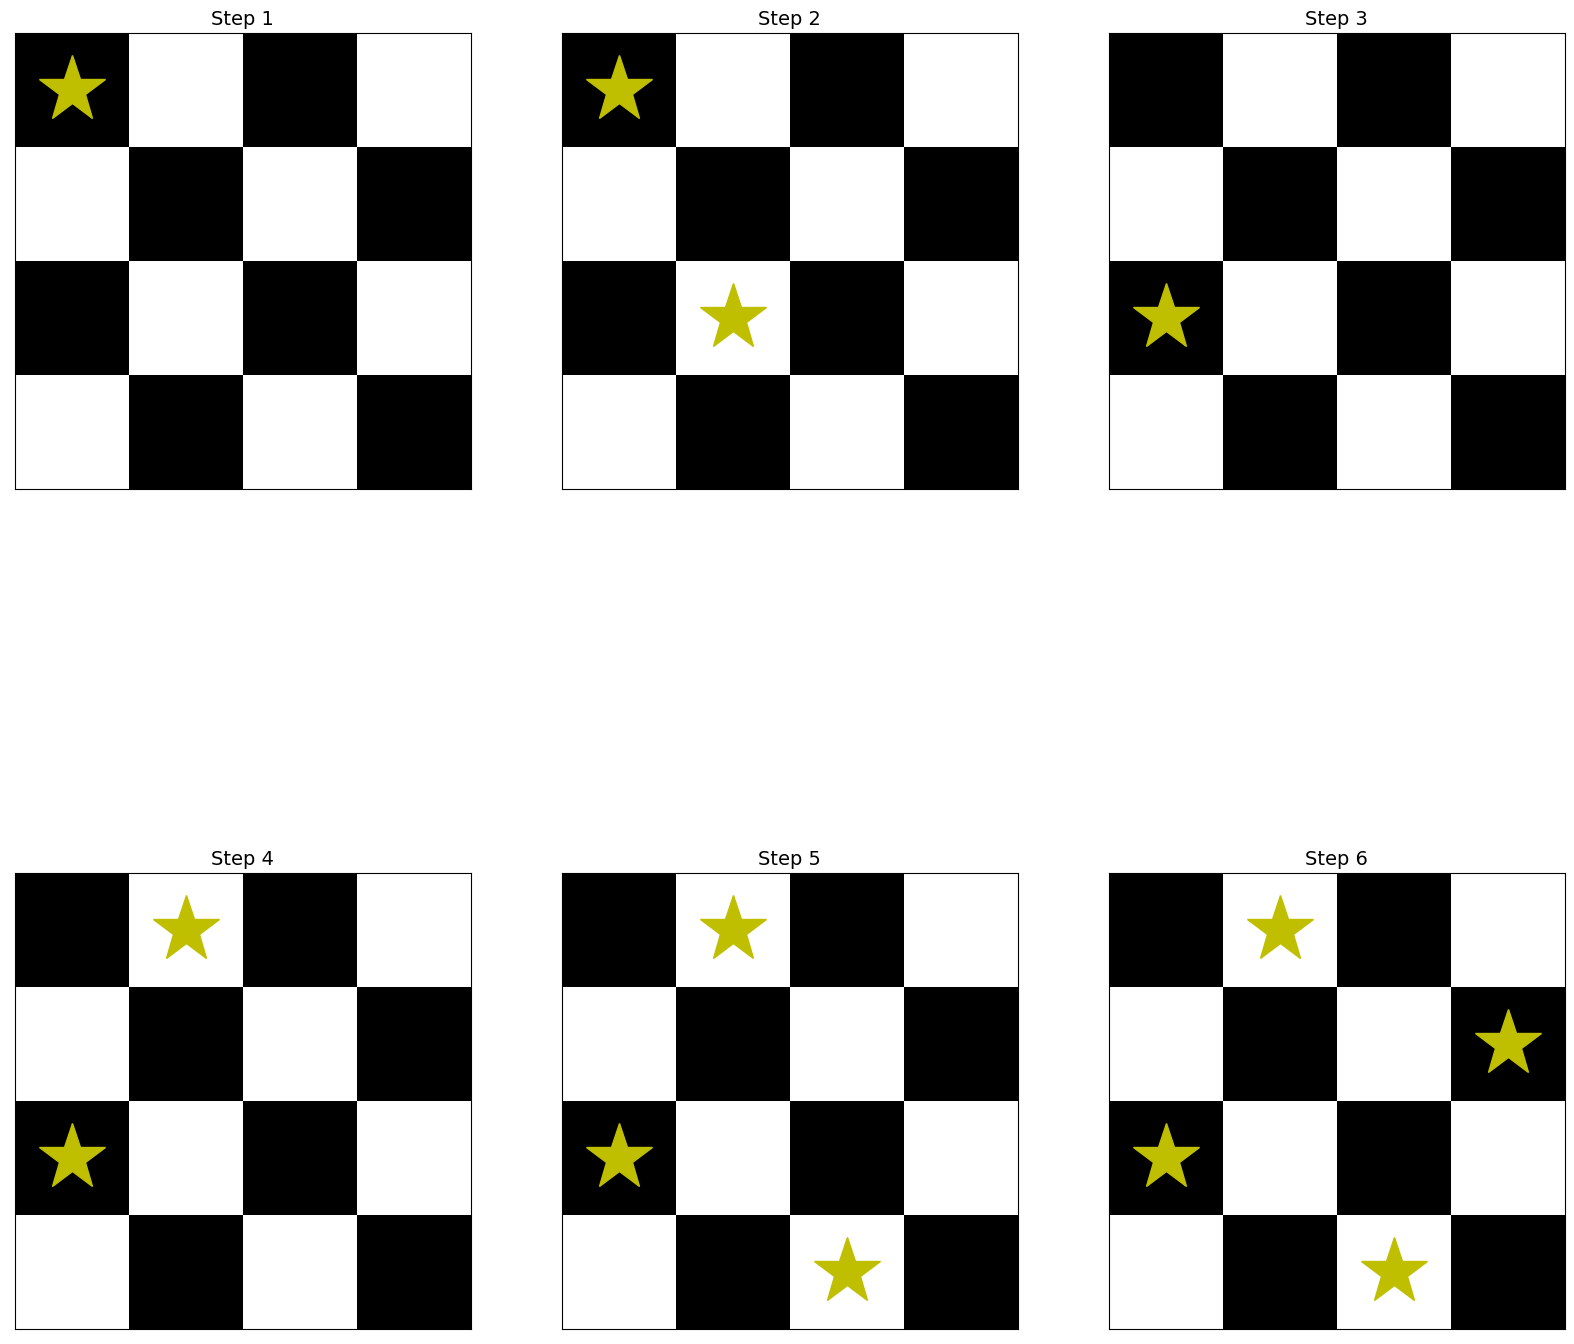

In [5]:
visualize(states)